# Compare multi fitted atmospheric parameters

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 21th 2023
- last update : February 21th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE="2023 01 (17,18,19) and 2022/03/17 and 2022/06 (29,30)"

In [6]:
FLAG_SELECT_POLAR = False

In [7]:
path_out = "dataout/fitparamatm"

In [8]:
ls dataout/fitparamatm

fitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin1.csv
fitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv
fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv
mul

In [9]:
!ls dataout/fitparamatm

fitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin1.csv
fitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv
fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
fitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv
multifitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv
mul

In [10]:
filenames = [
"multifitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv", 
"multifitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv",    
#"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv",
]

In [11]:
NDAYS = 3
tags = ["OG550 23/01/17", "OG550 23/01/18", "OG550 23/01/19", "No Filt 23/01/17", "NoFilt 23/01/18", "NoFilt 23/01/19",
       "No fit 2022/03/17","No fit 2022/06/29","No fit 2022/06/30"]

In [12]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename))
    if FLAG_SELECT_POLAR:
        df = df[df["object"]=='HD185975']
    all_df.append(df)

In [13]:
NF =len(all_df)

In [14]:
all_df[0].head()

Unnamed: 0  number    object                         dateobs   refhour  \
0           0     253  HD185975  2023-01-18T03:08:52.415500962Z -1.943737   
1           1     269   HD38666  2023-01-18T03:21:14.695994415Z -1.737548   
2           2     270   HD38666  2023-01-18T03:21:57.571002150Z -1.725638   
3           3     279   HD38666  2023-01-18T03:27:10.165993443Z -1.638806   
4           4     280   HD38666  2023-01-18T03:27:52.980498634Z -1.626913   

    airmass  pressure  temperature  humidity       filename  ...   egrey_3  \
0  2.111228         0            0         0  2023011700253  ...  0.001285   
1  1.011768         0            0         0  2023011700269  ...  0.000284   
2  1.012175         0            0         0  2023011700270  ...  0.000244   
3  1.015372         0            0         0  2023011700279  ...  0.000231   
4  1.015841         0            0         0  2023011700280  ...  0.000291   

      SNR_3     chi2_4     pwv_4    grey_4    epwv_4   egrey_4     SNR_4  \
0  0.001653   6.252850  3.377284  1.013192  0.151969  0.001283  0.047539   
1  0.075939  18.577583  3.547707  1.026238  0.054017  0.000250  0.023979   
2  0.098715  53.389968  3.328142  1.015669  0.046072  0.000214  0.049960   
3  0.068669  33.769314  3.055910  1.025976  0.042728  0.000203  0.010224   
4  0.067135  19.594891  3.451896  1.026384  0.054151  0.000256  0.018555   

    pwv_avg   pwv_sig  
0  2.960608  0.075265  
1  3.489887  0.055749  
2  3.715374  0.067243  
3  3.165236  0.029121  
4  3.418678  0.030066  

[5 rows x 42 columns]

In [15]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/1489658469.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


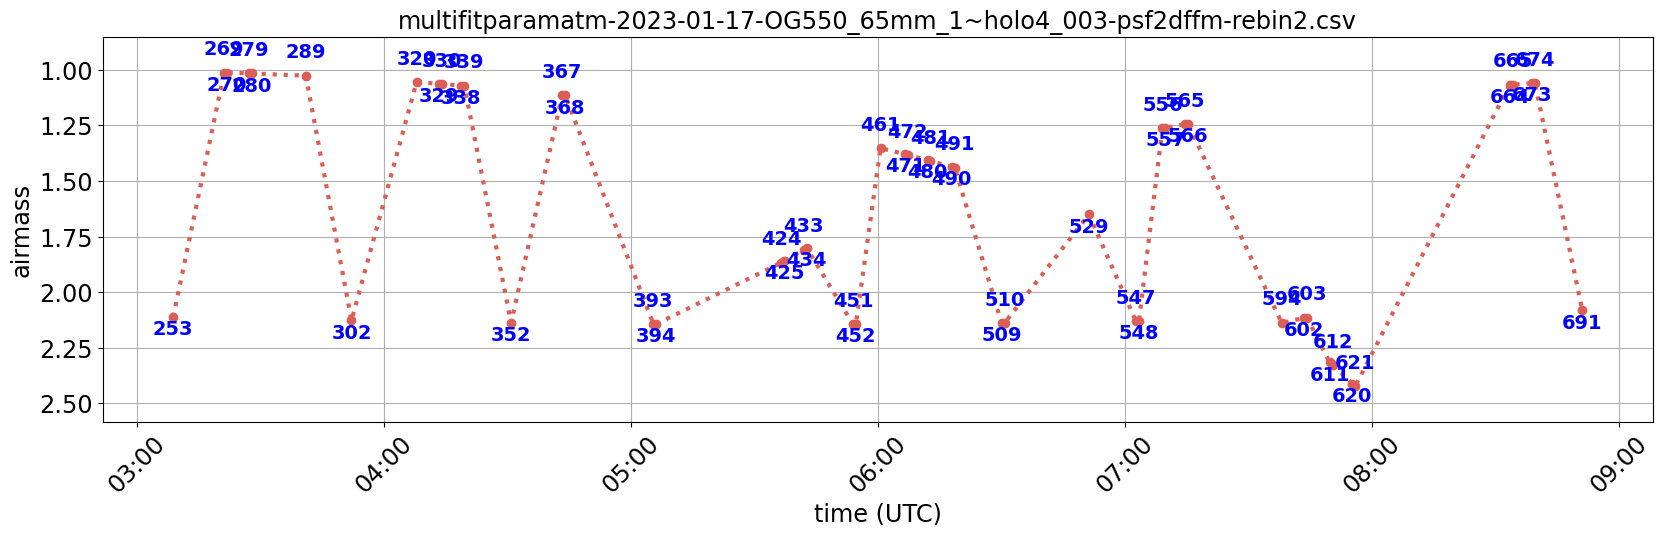

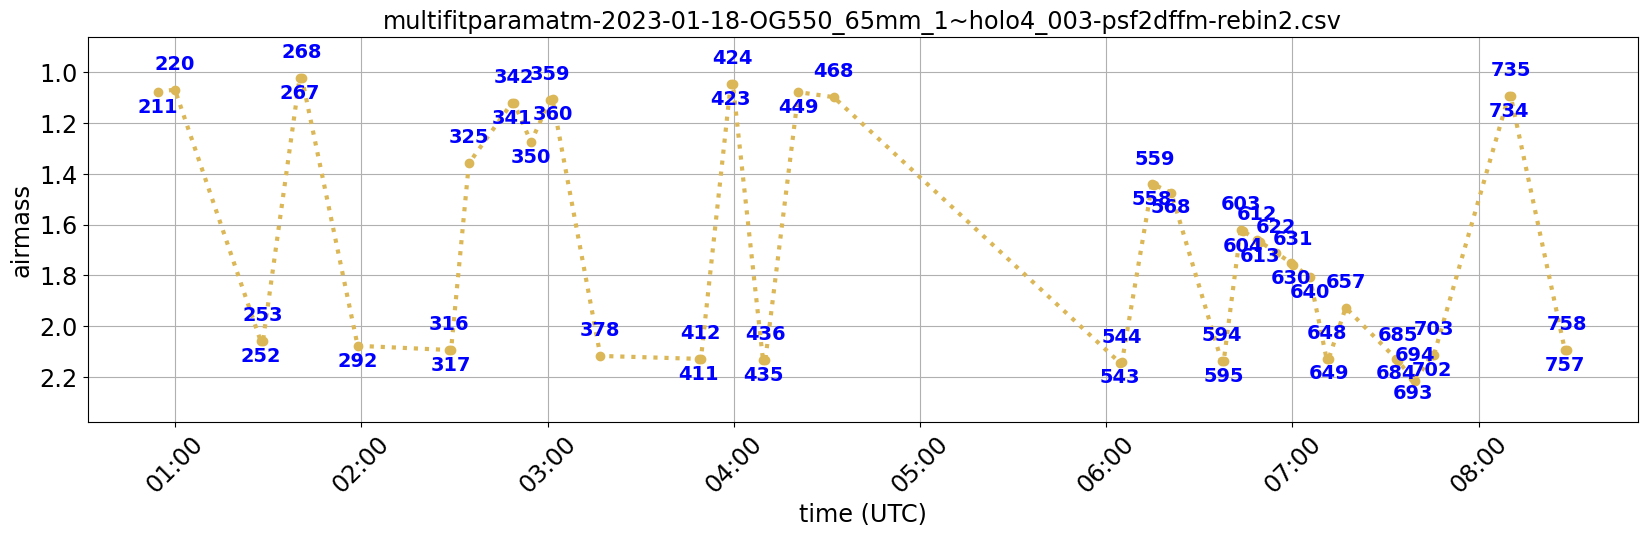

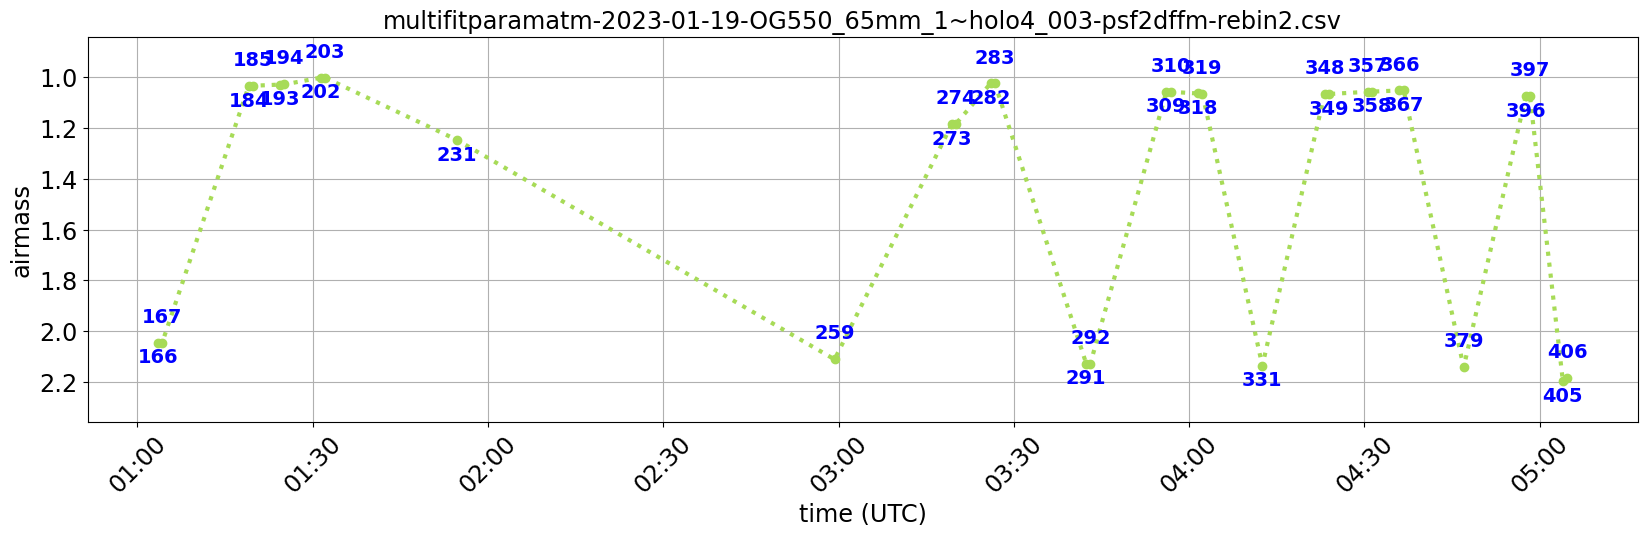

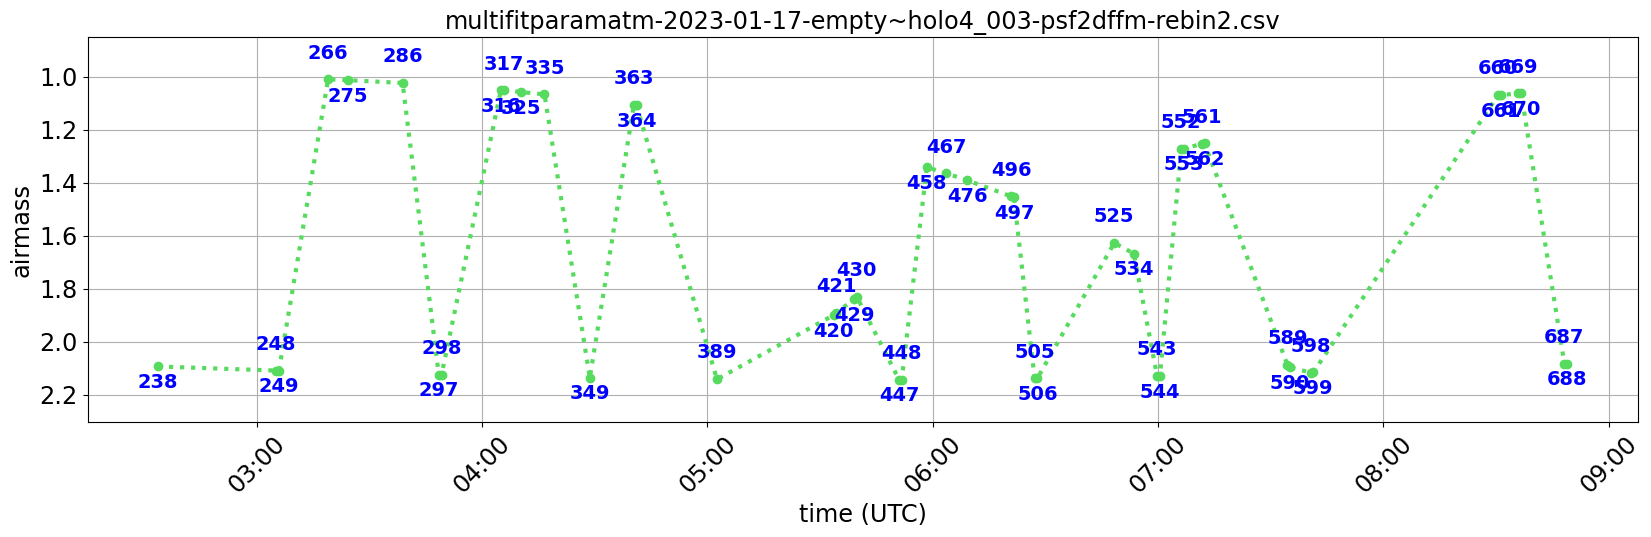

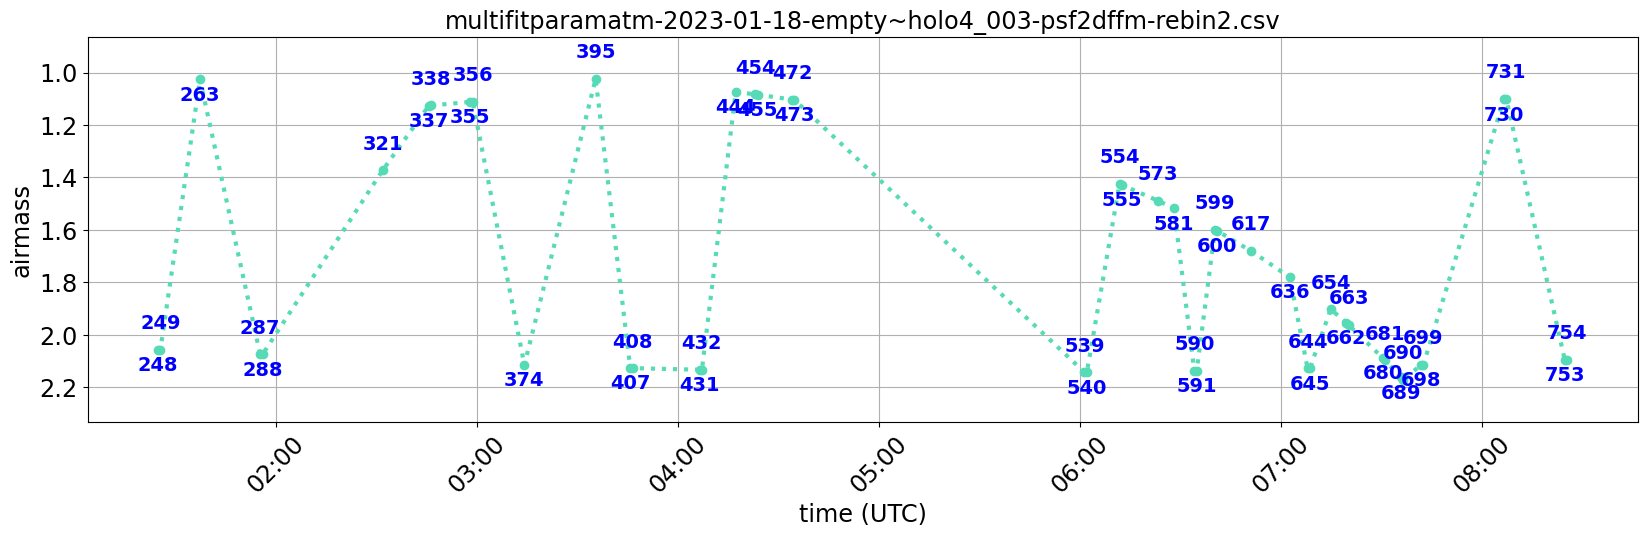

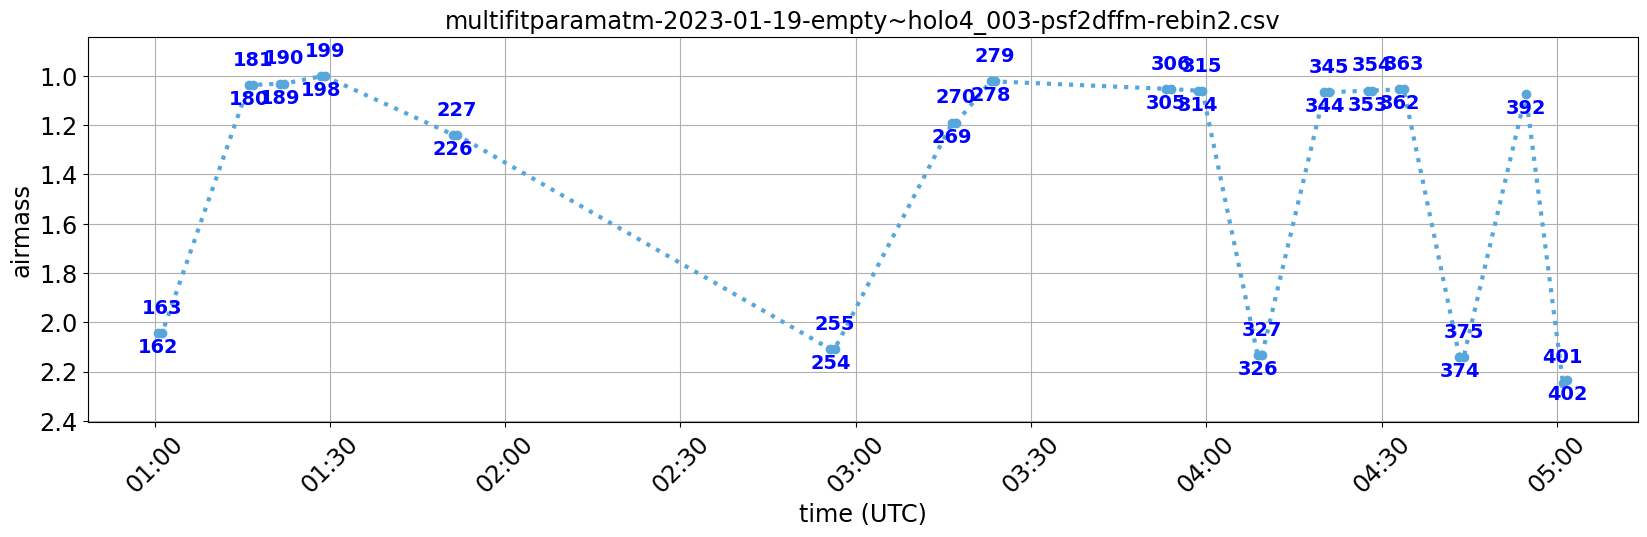

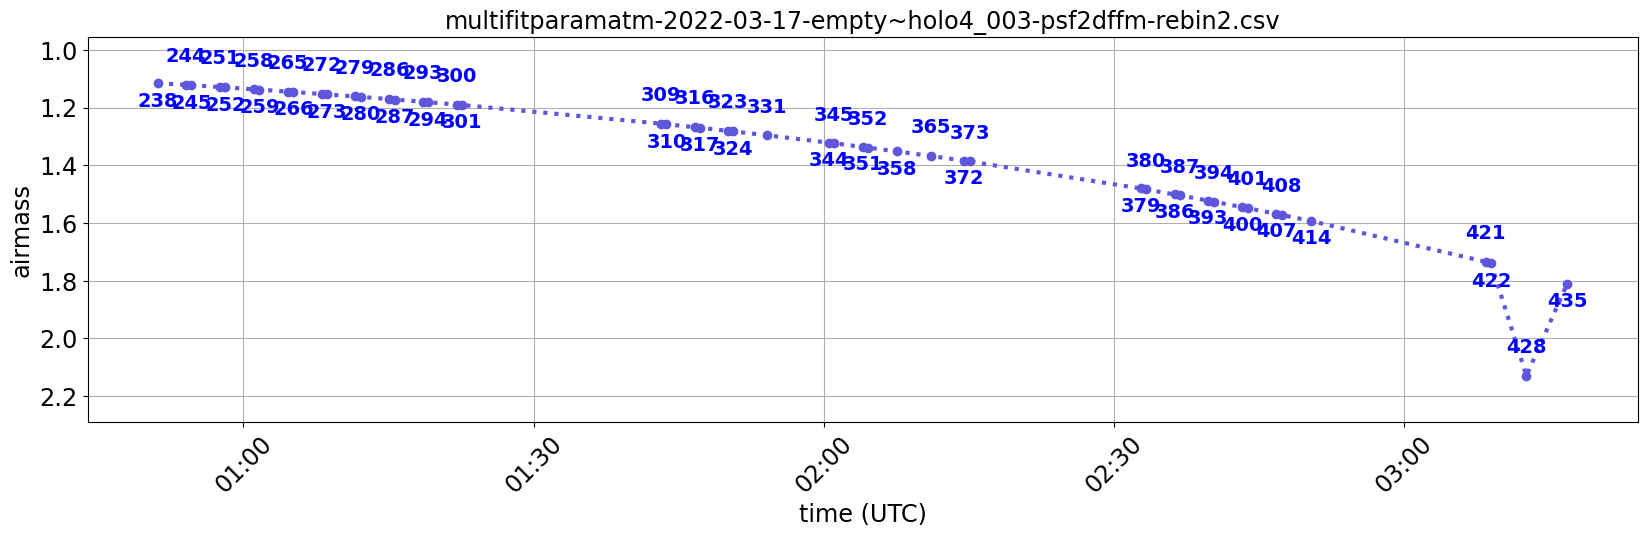

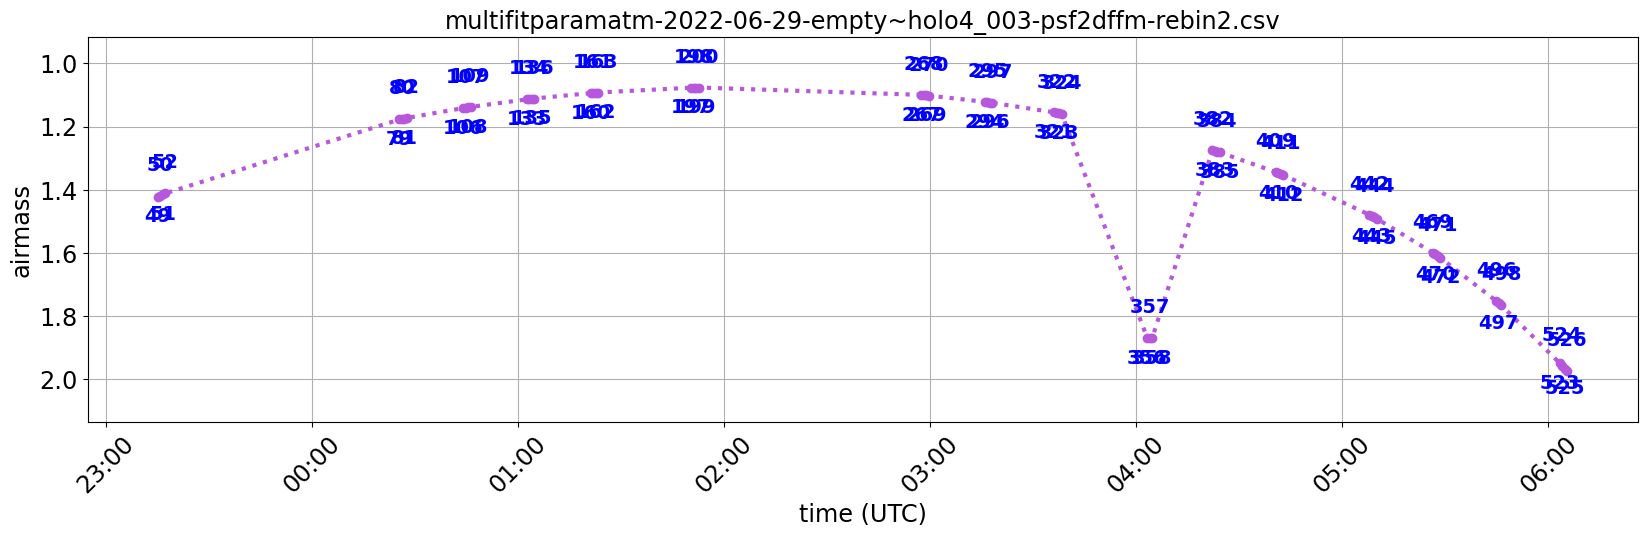

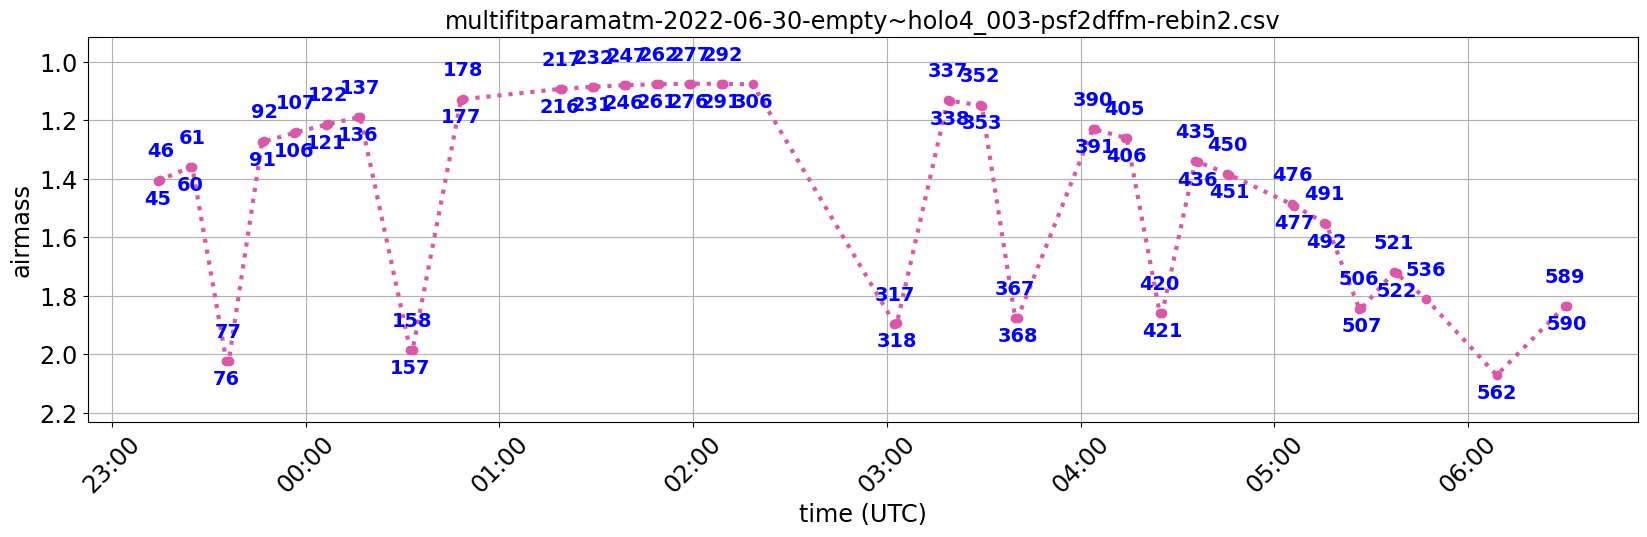

In [16]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)

    

    y_shift= 0.08

  
    ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("airmass")
    ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

## Precipitable water vapor

In [17]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/188516229.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


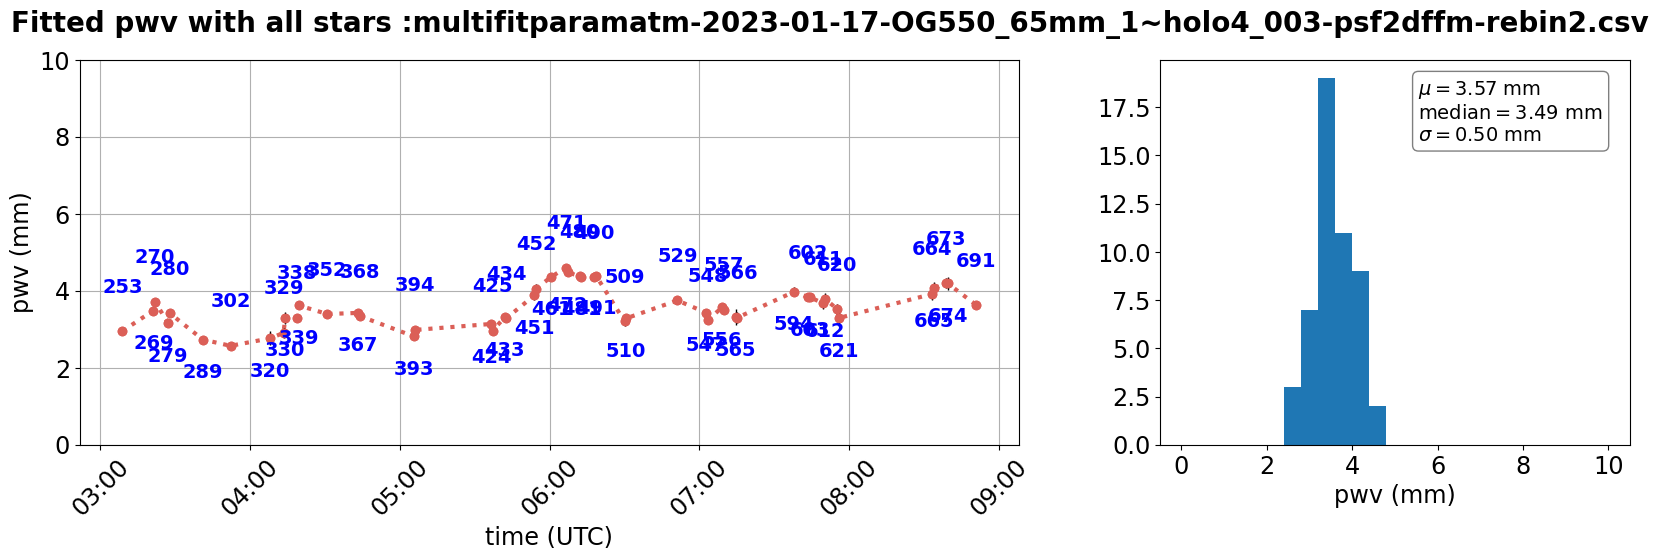

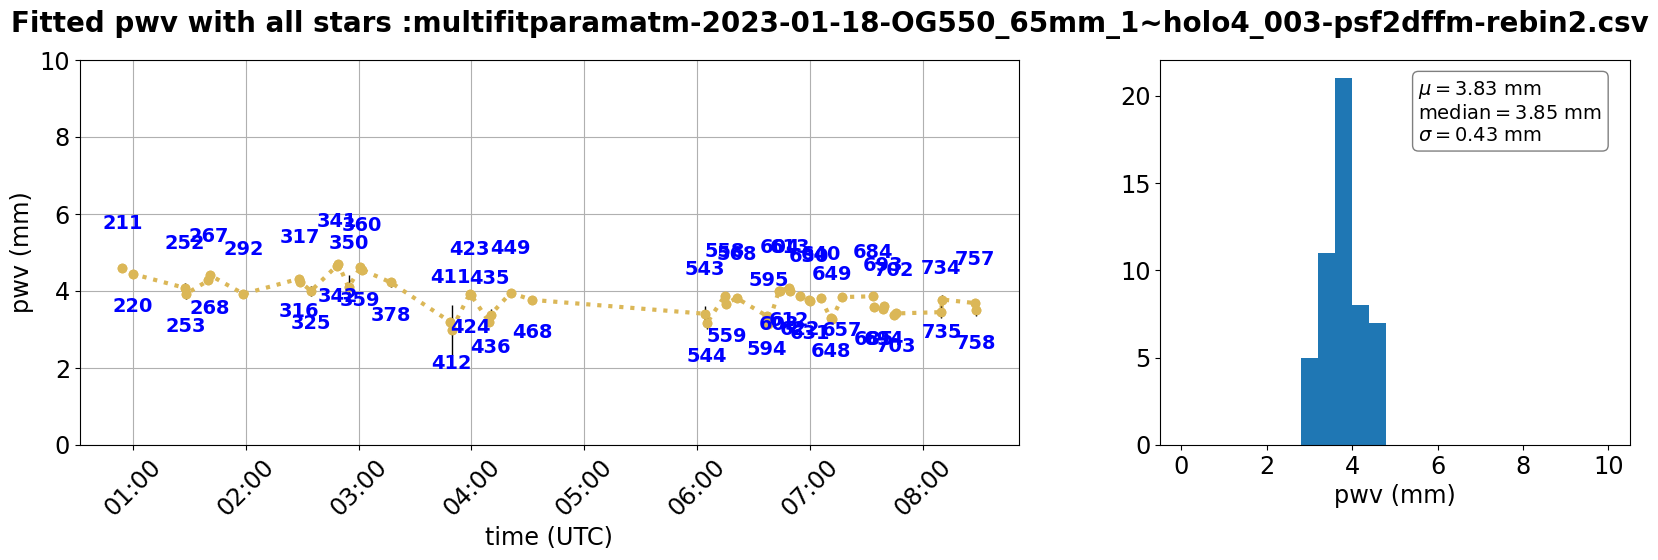

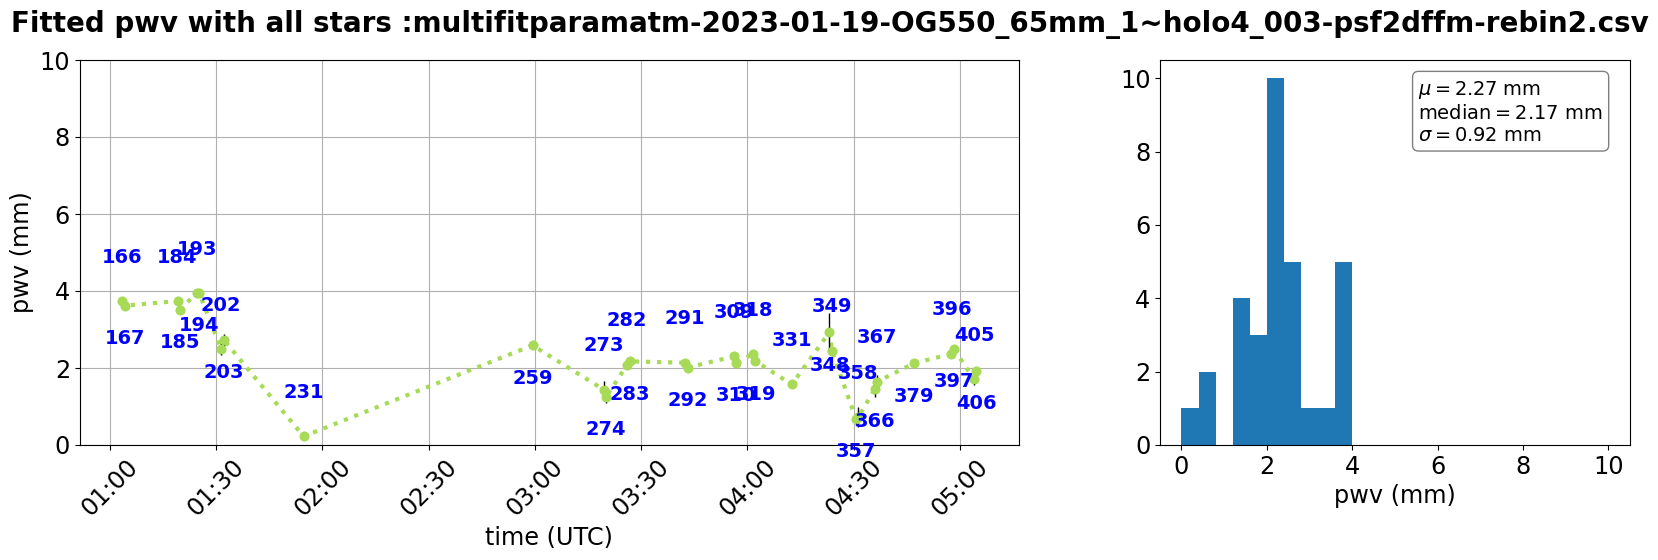

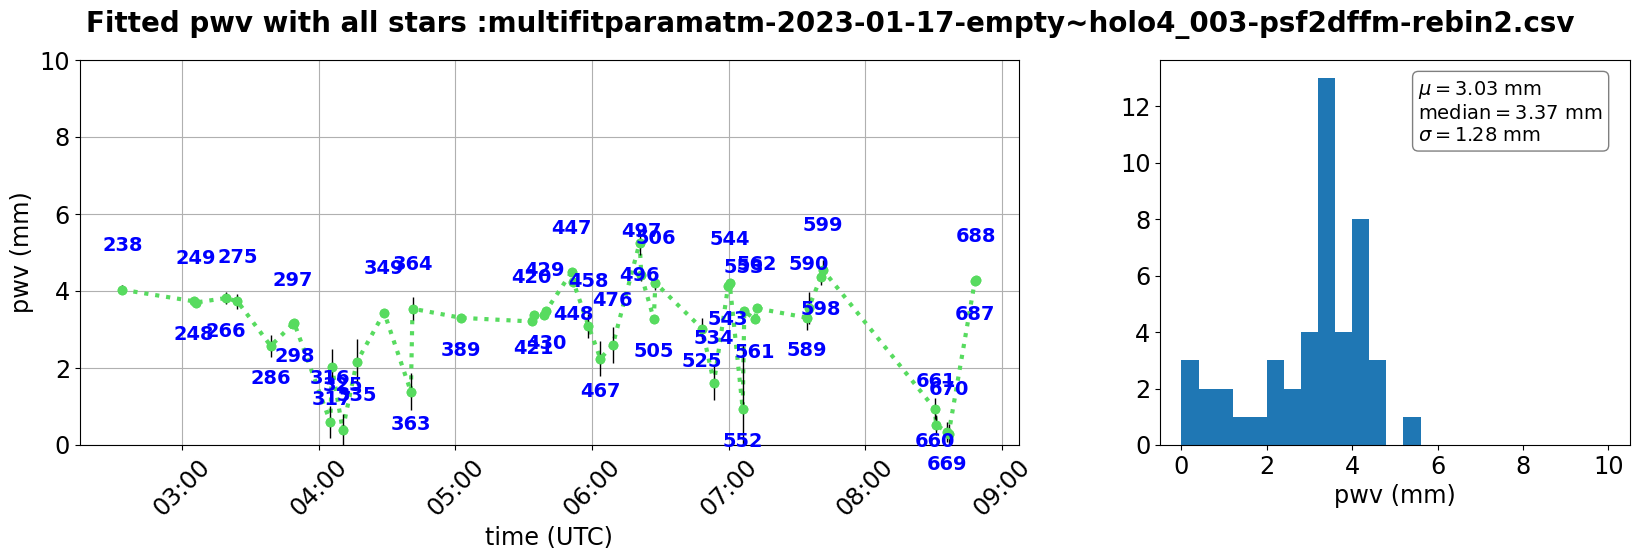

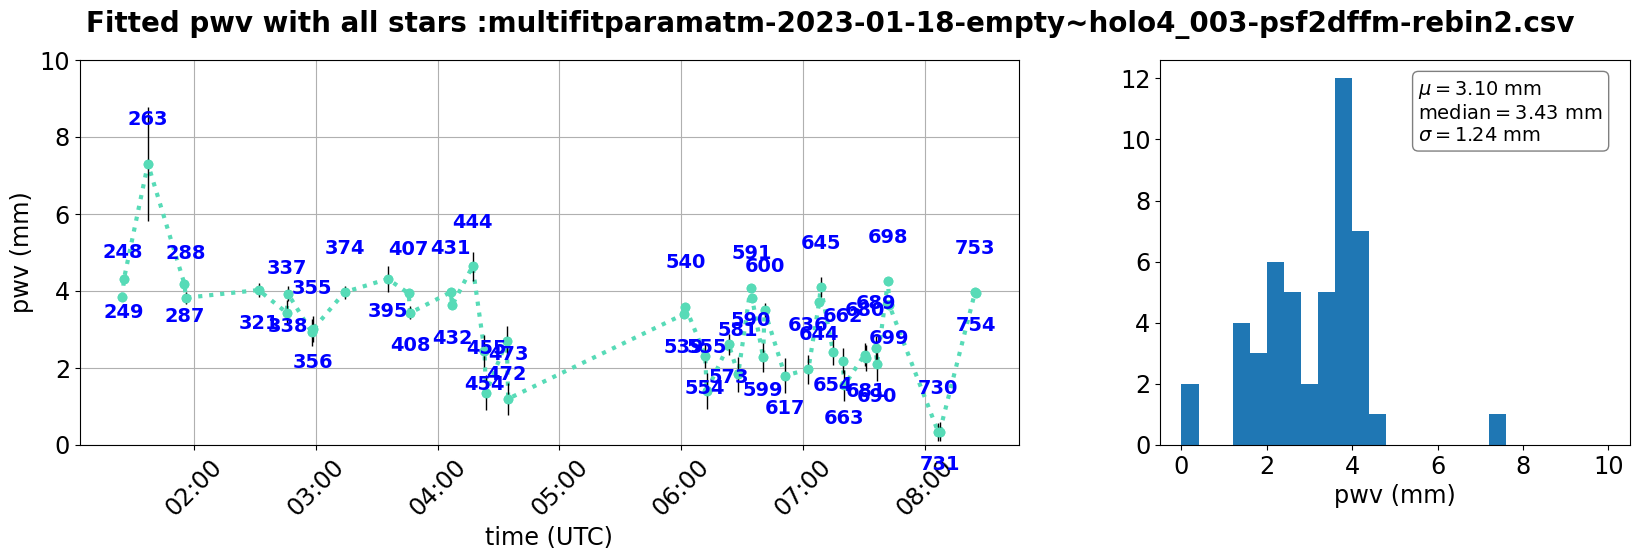

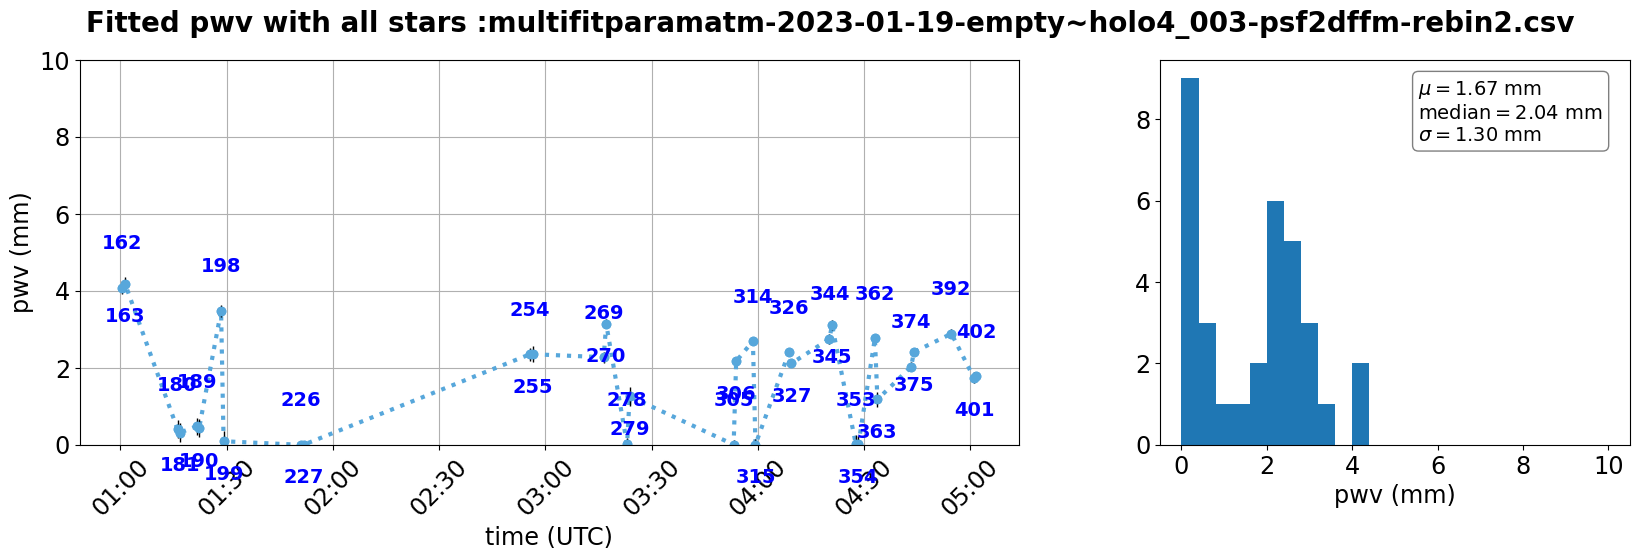

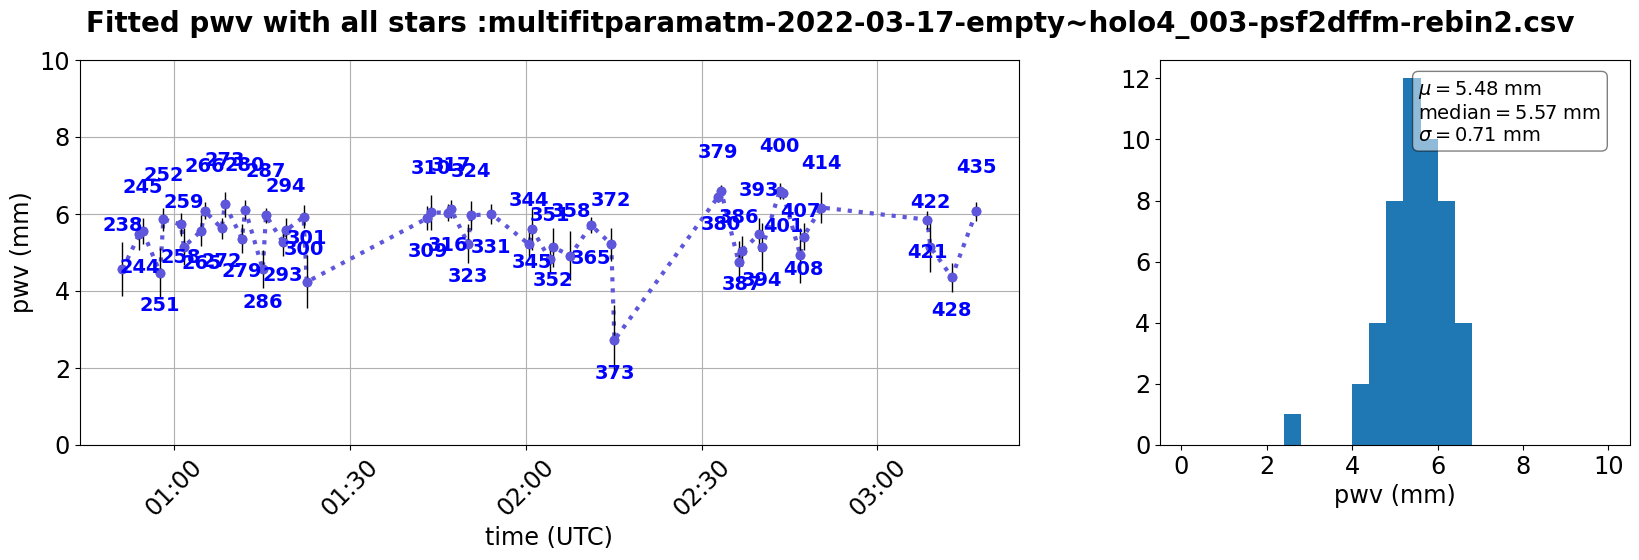

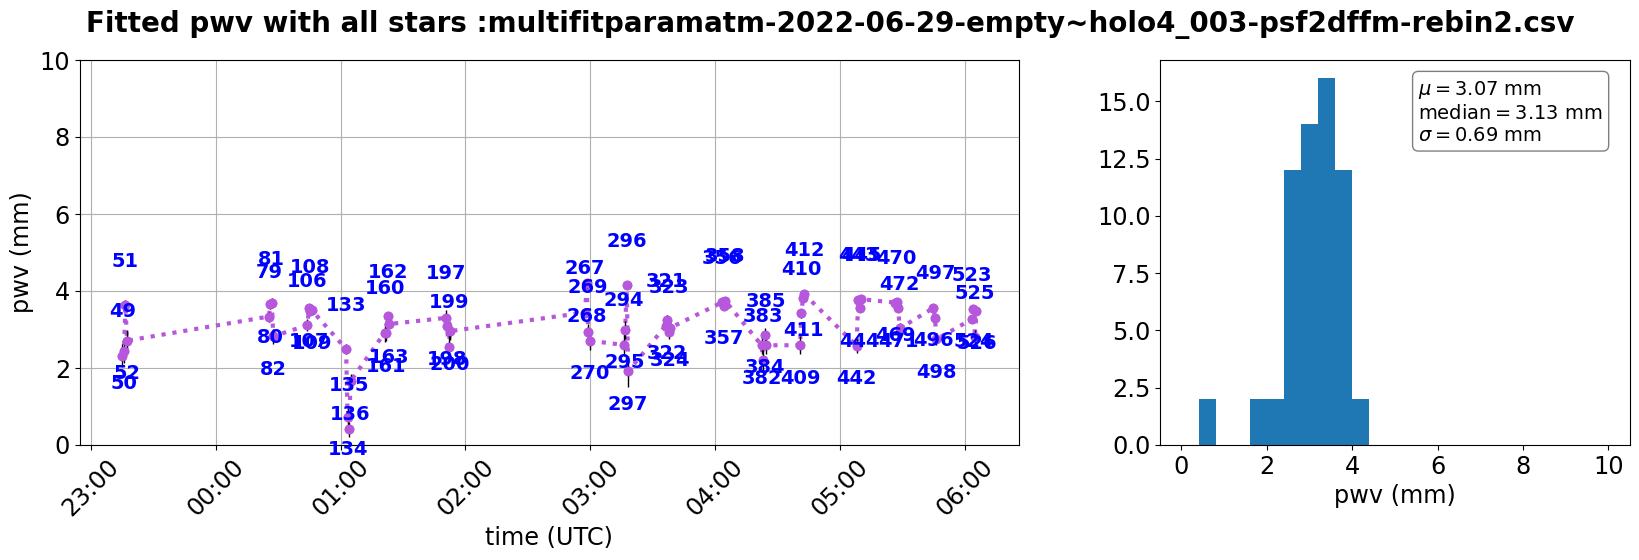

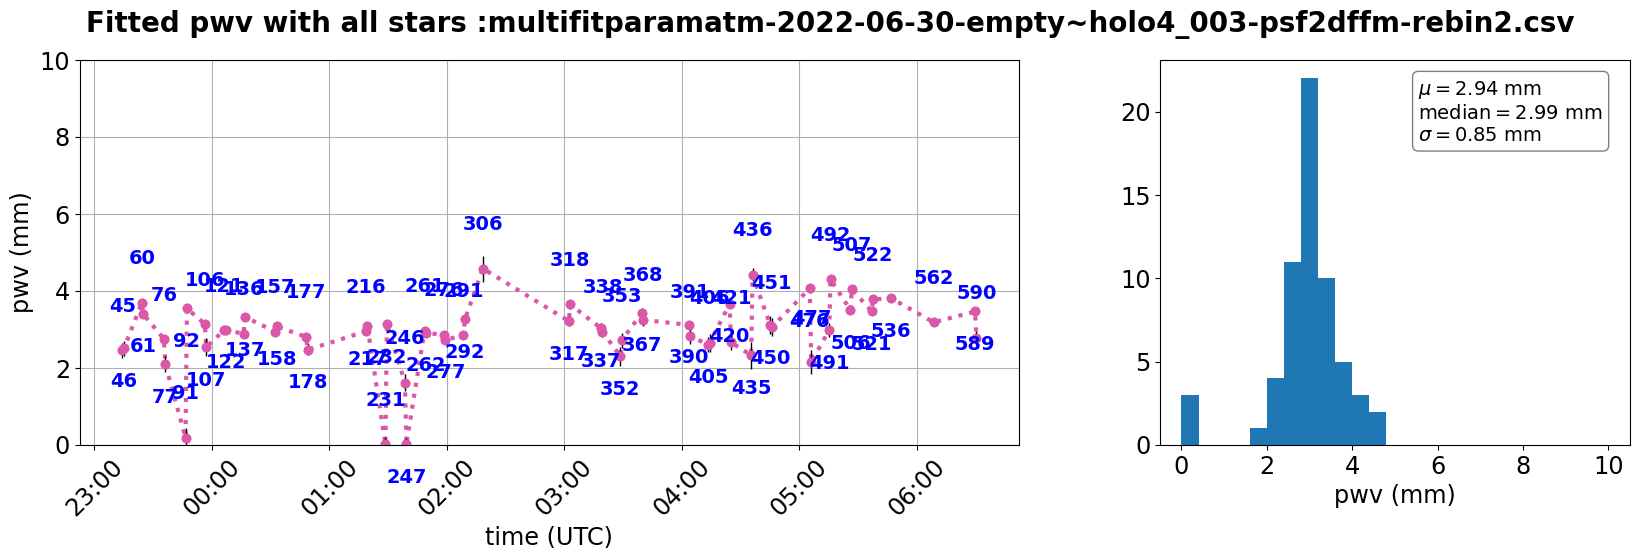

In [18]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10))
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/3320311040.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


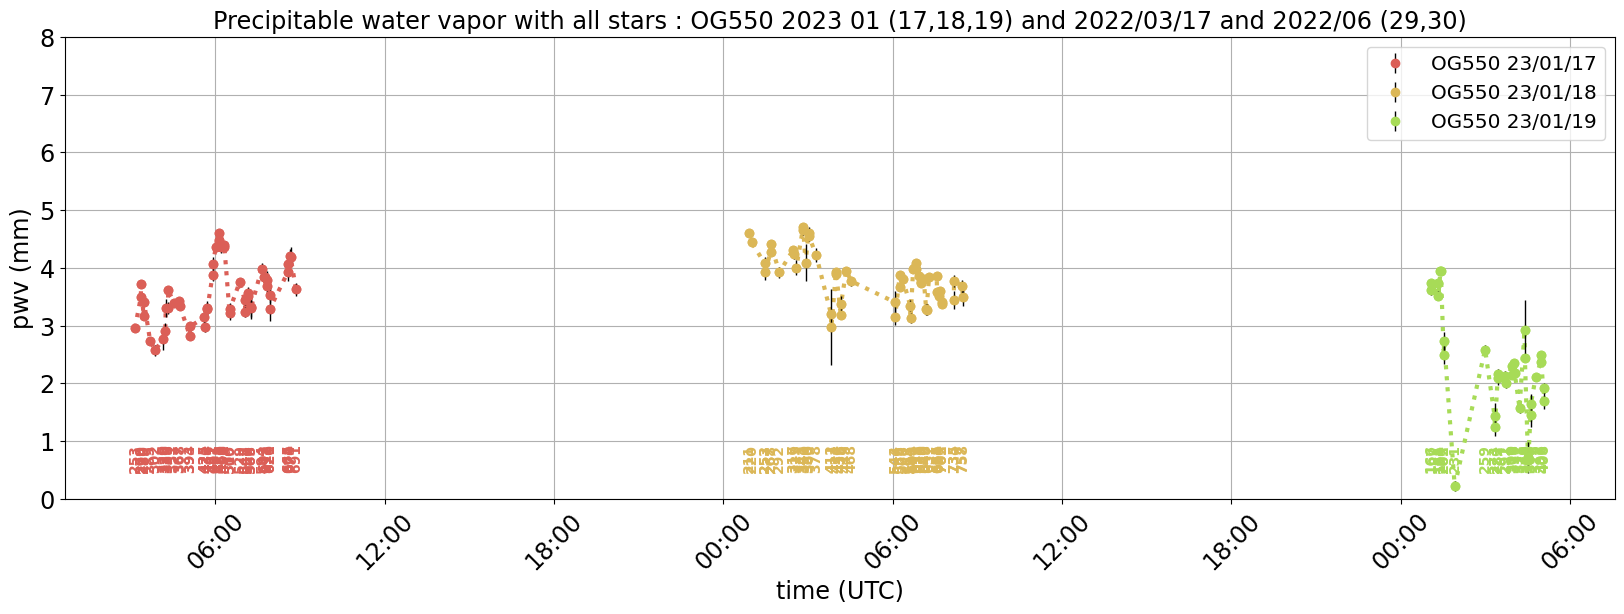

In [19]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx>2:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,8) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Precipitable water vapor with polar star HD185975 : OG550 {DATE}"
else:
    the_title = f"Precipitable water vapor with all stars : OG550 {DATE}"

plt.title(the_title)
plt.grid()
plt.show()

     

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/622844527.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


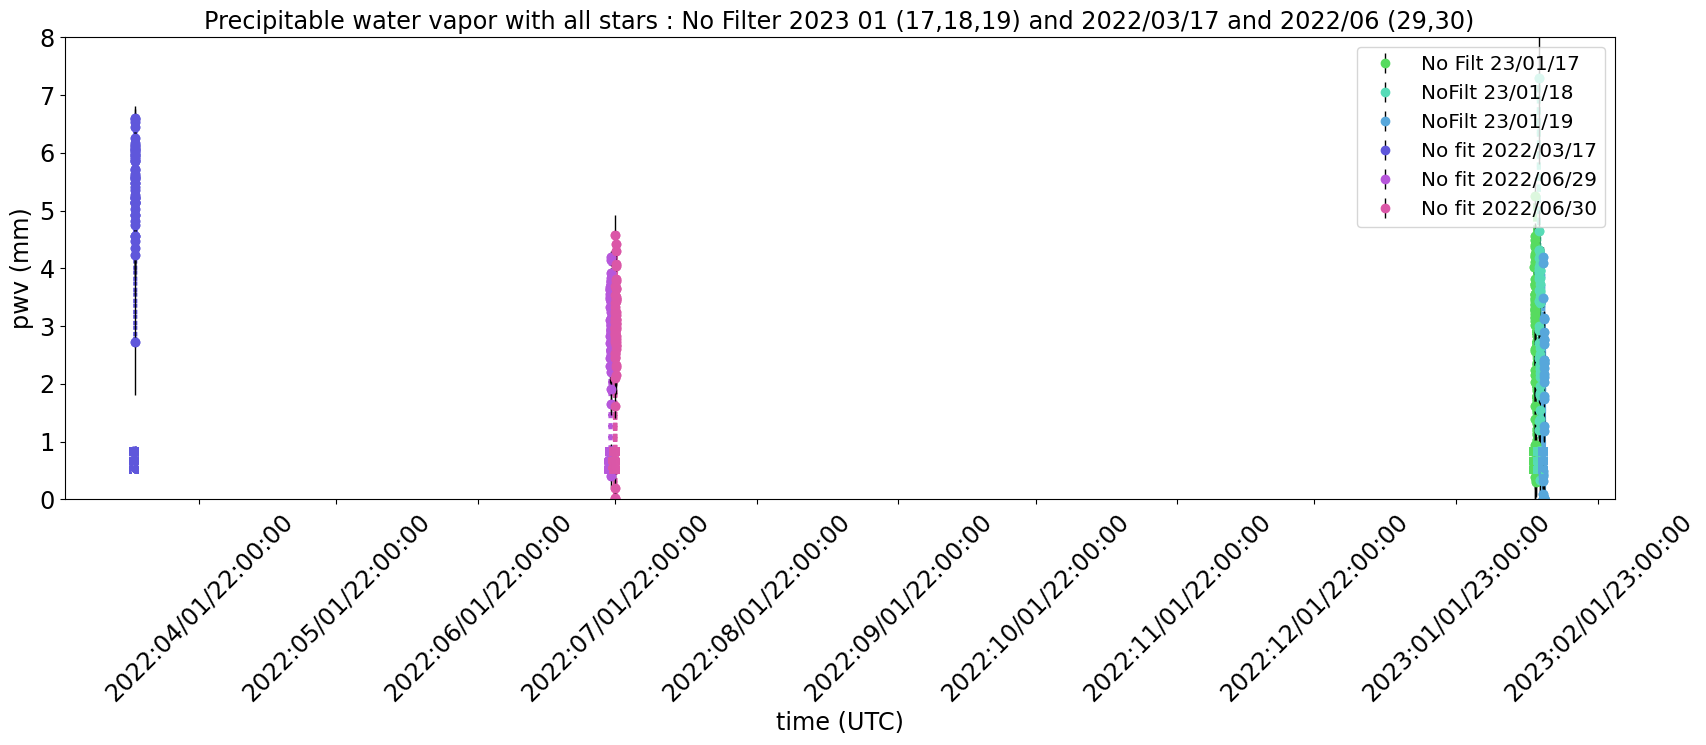

In [20]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx<3:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%Y:%D:%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,8) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Precipitable water vapor with polar star HD185975 : No Filter {DATE}"
else:
    the_title = f"Precipitable water vapor with all stars : No Filter {DATE}"


plt.title(the_title)
plt.grid()
plt.show()

     

In [21]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/2231691388.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)


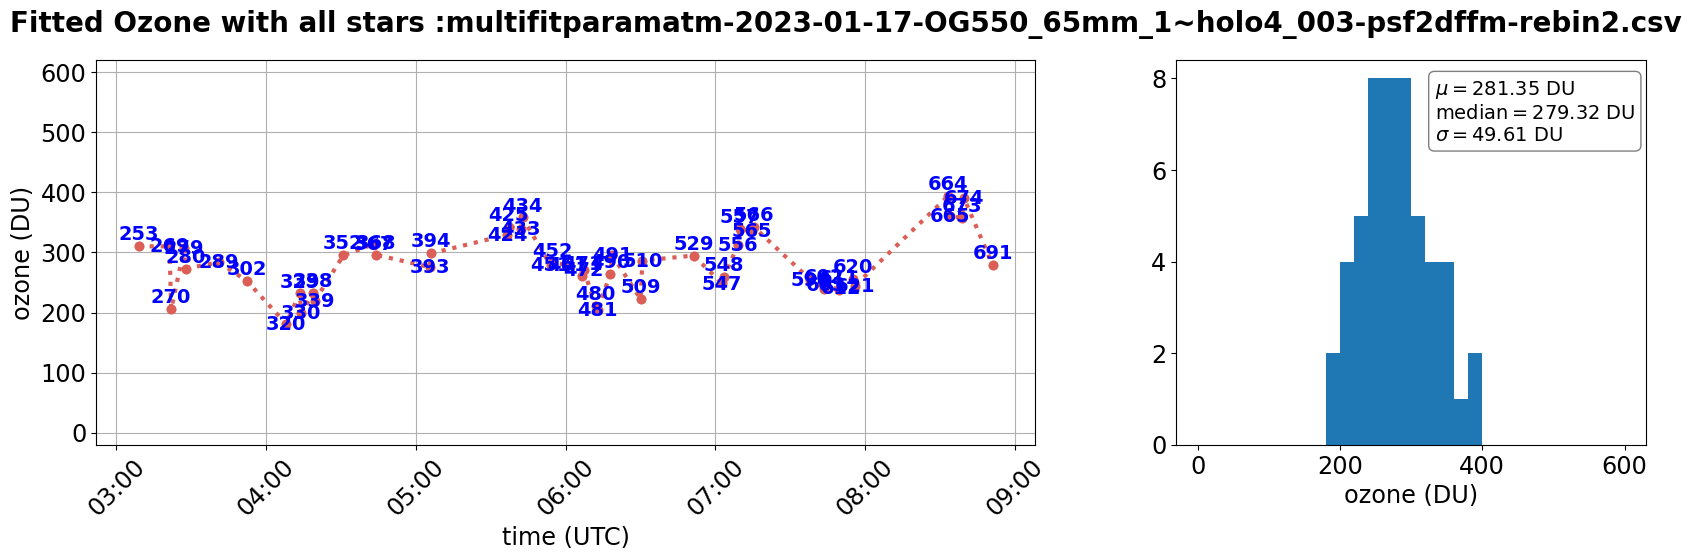

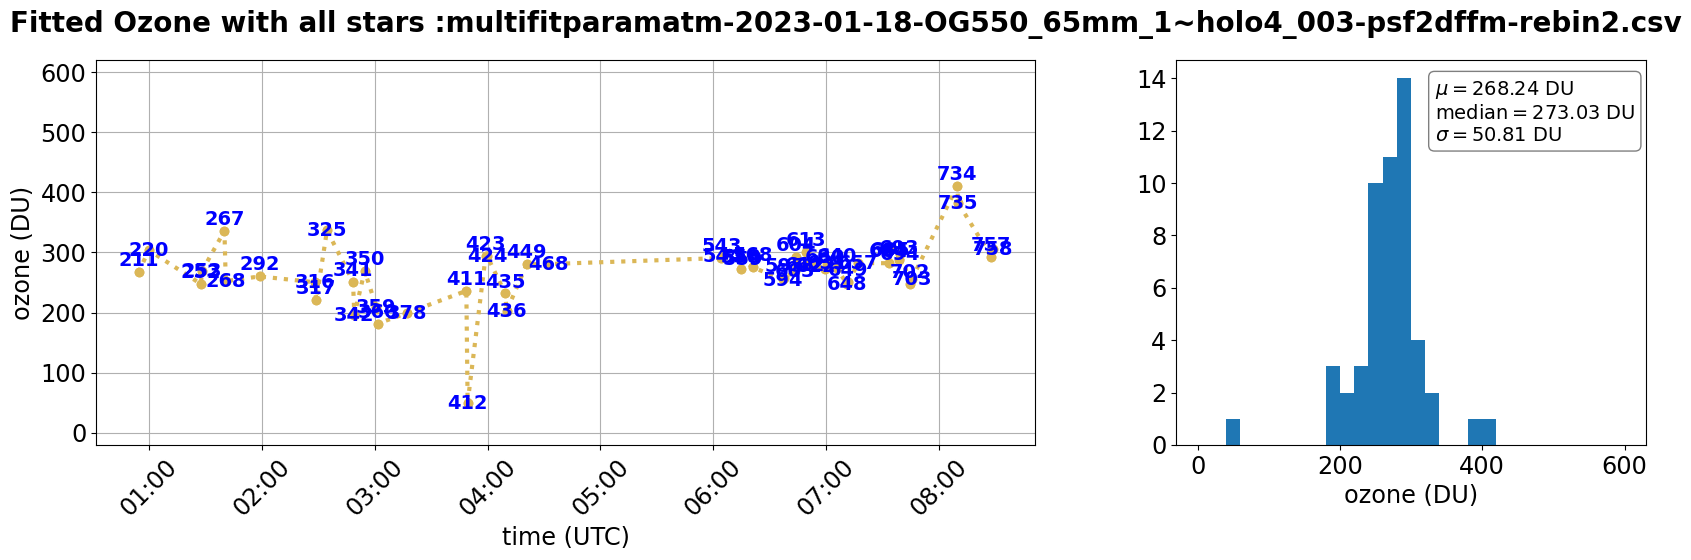

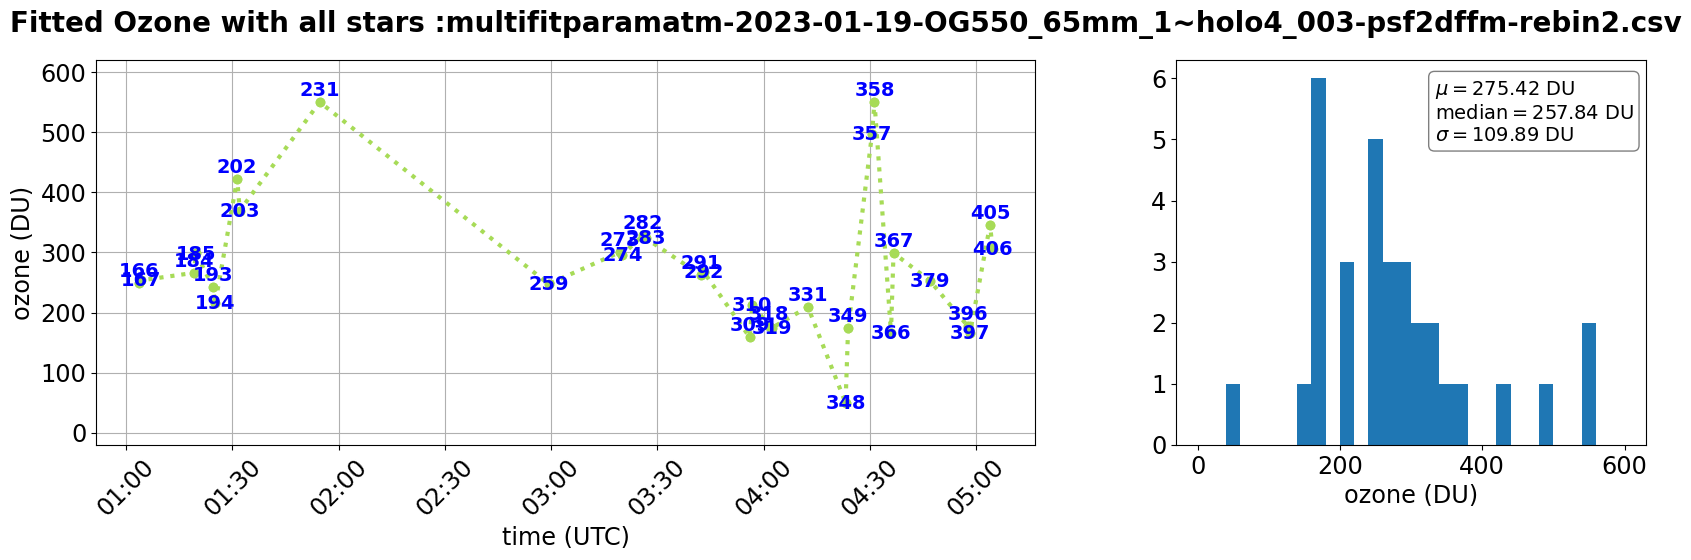

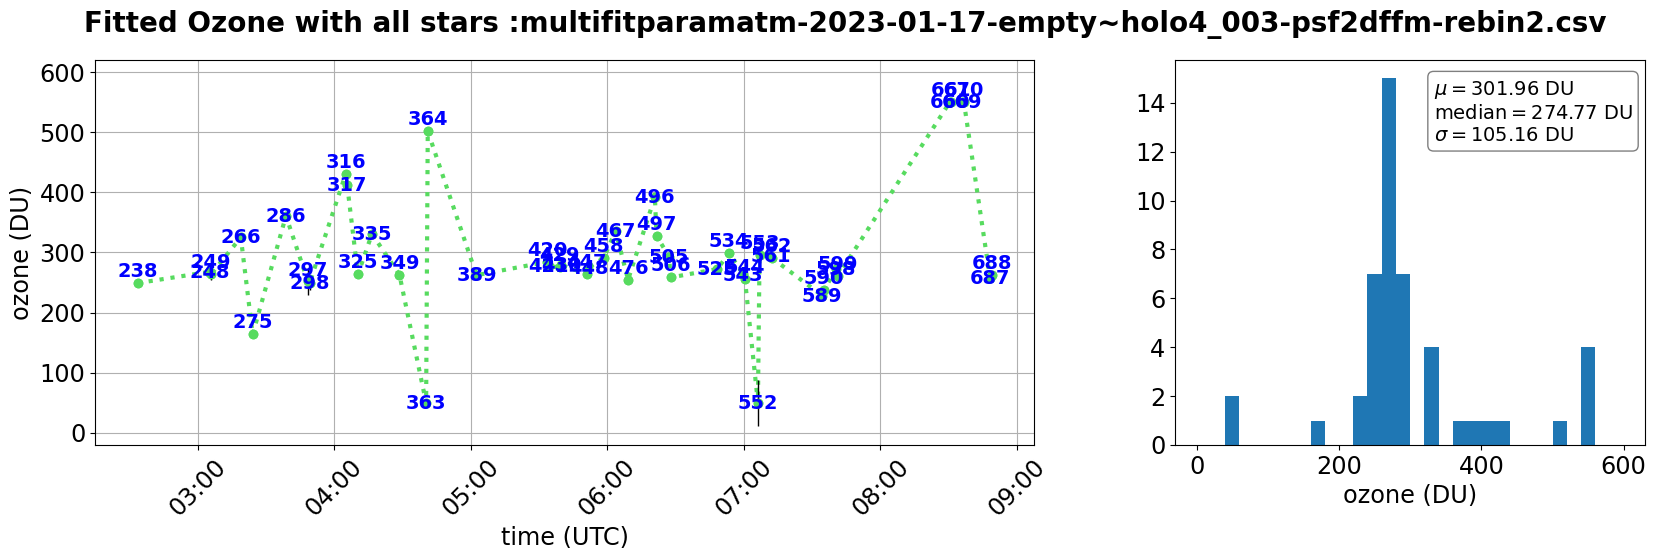

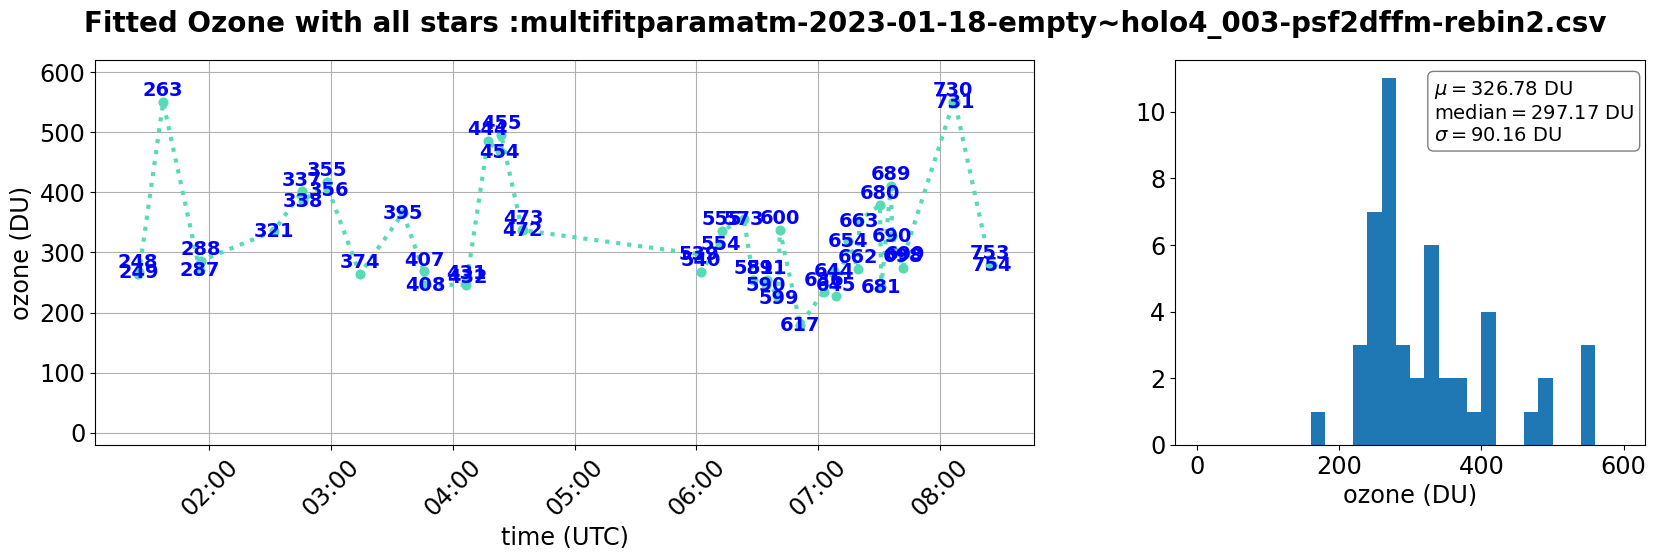

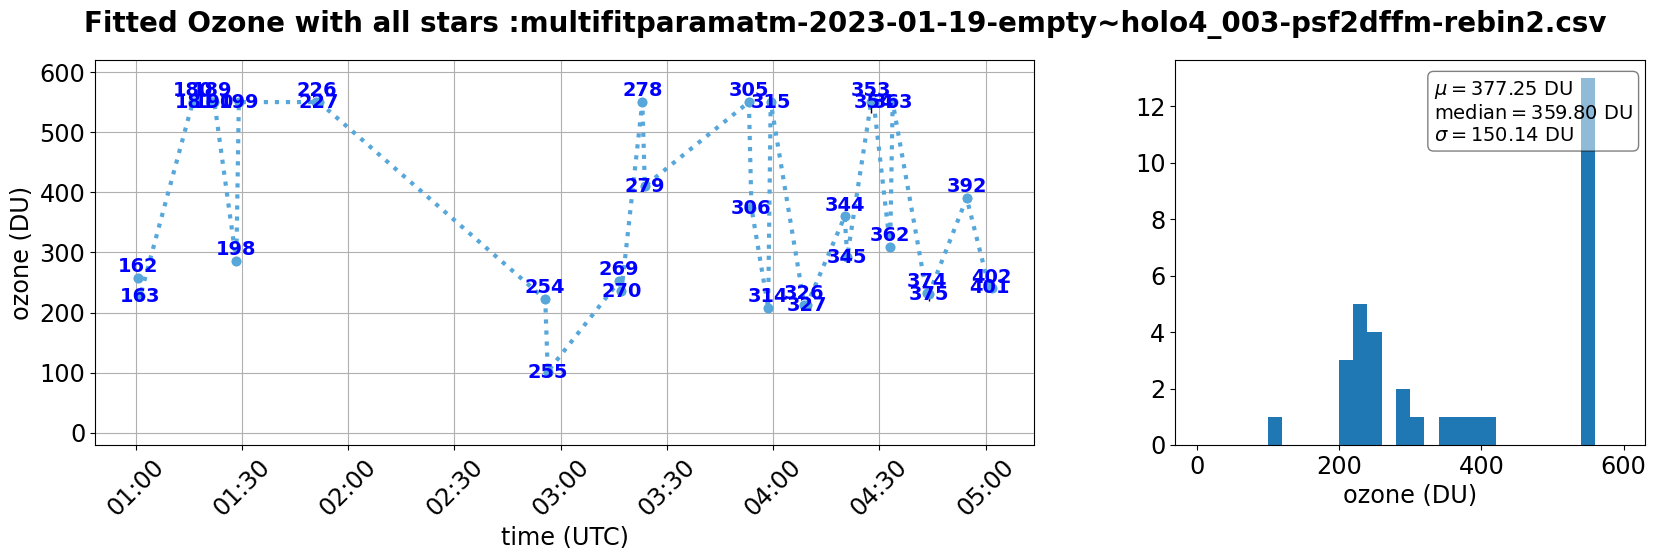

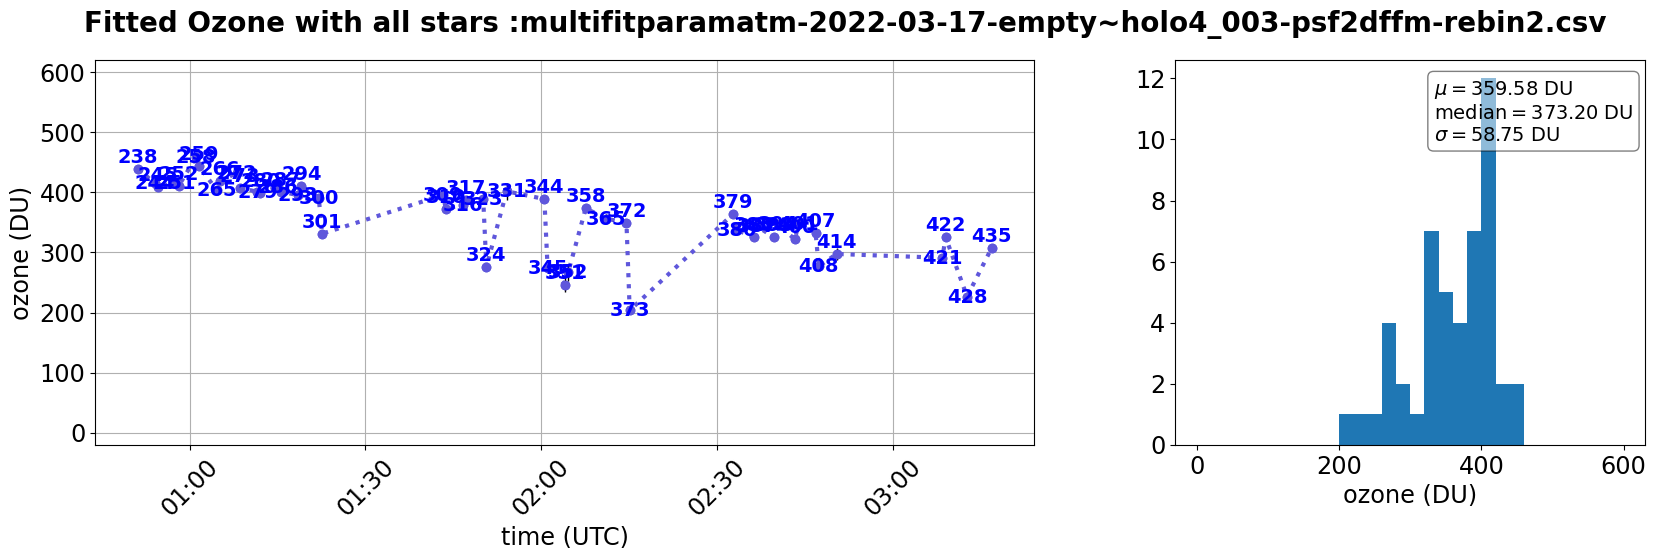

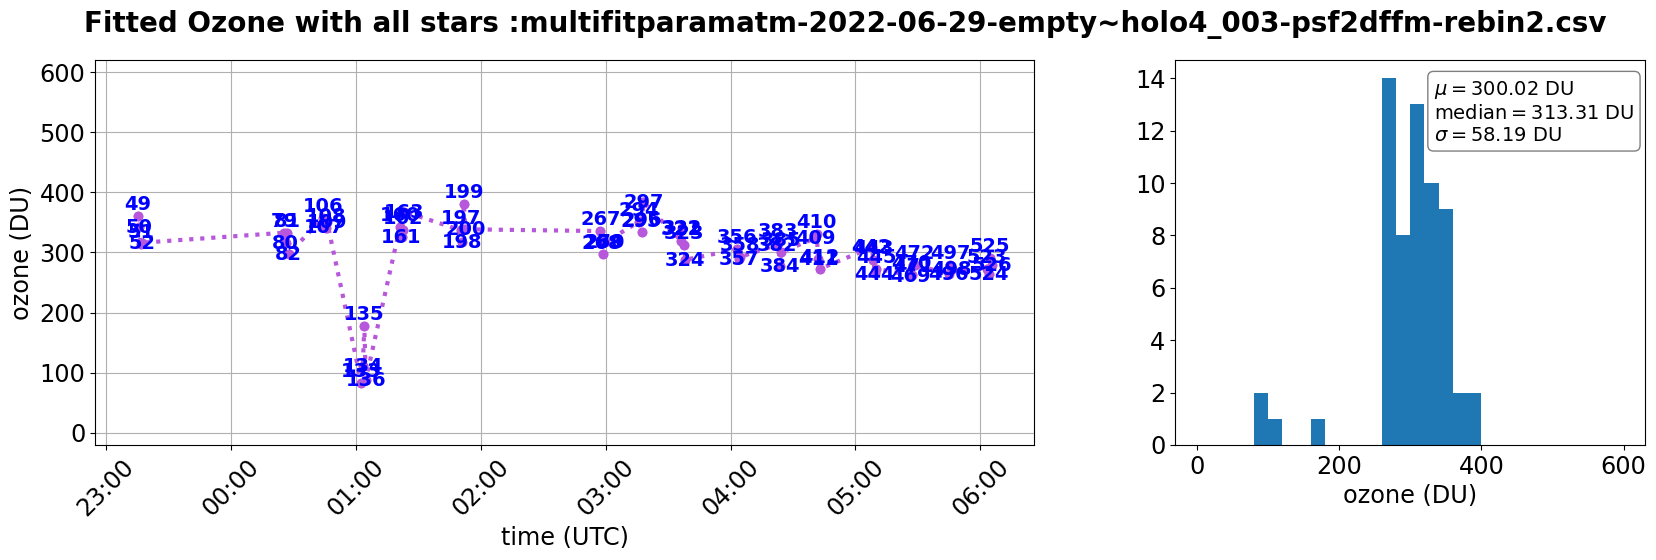

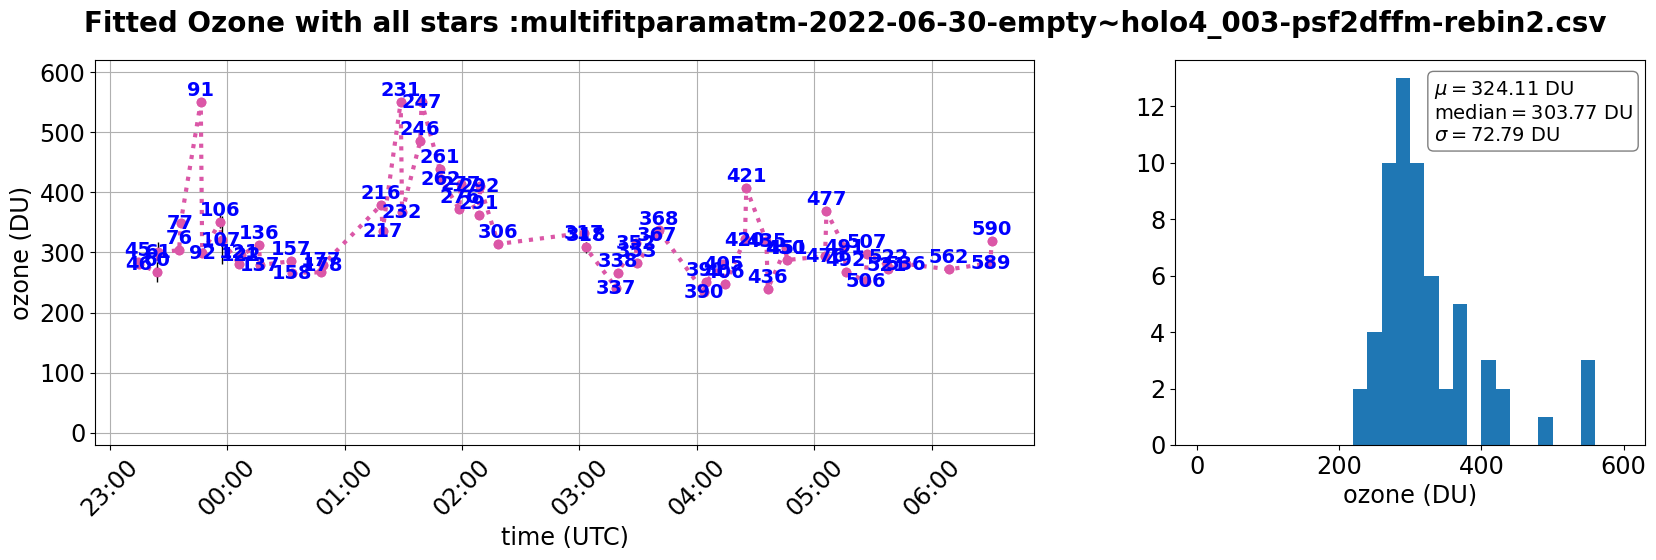

In [22]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    oz= infos['oz_1'].values
    eoz= infos['eoz_1'].values
    

    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 10

  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    ax.set_ylim(0-2*y_shift,600.+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], oz[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(oz,bins=30,range=(0,600))
    ax.set_xlabel("ozone (DU)")
    
    mu = oz.mean()
    median = np.median(oz)
    sigma = oz.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ DU' % (mu, ),
    r'$\mathrm{median}=%.2f$ DU' % (median, ),
    r'$\sigma=%.2f$ DU' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
   
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted Ozone with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted Ozone with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_87353/846748606.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)


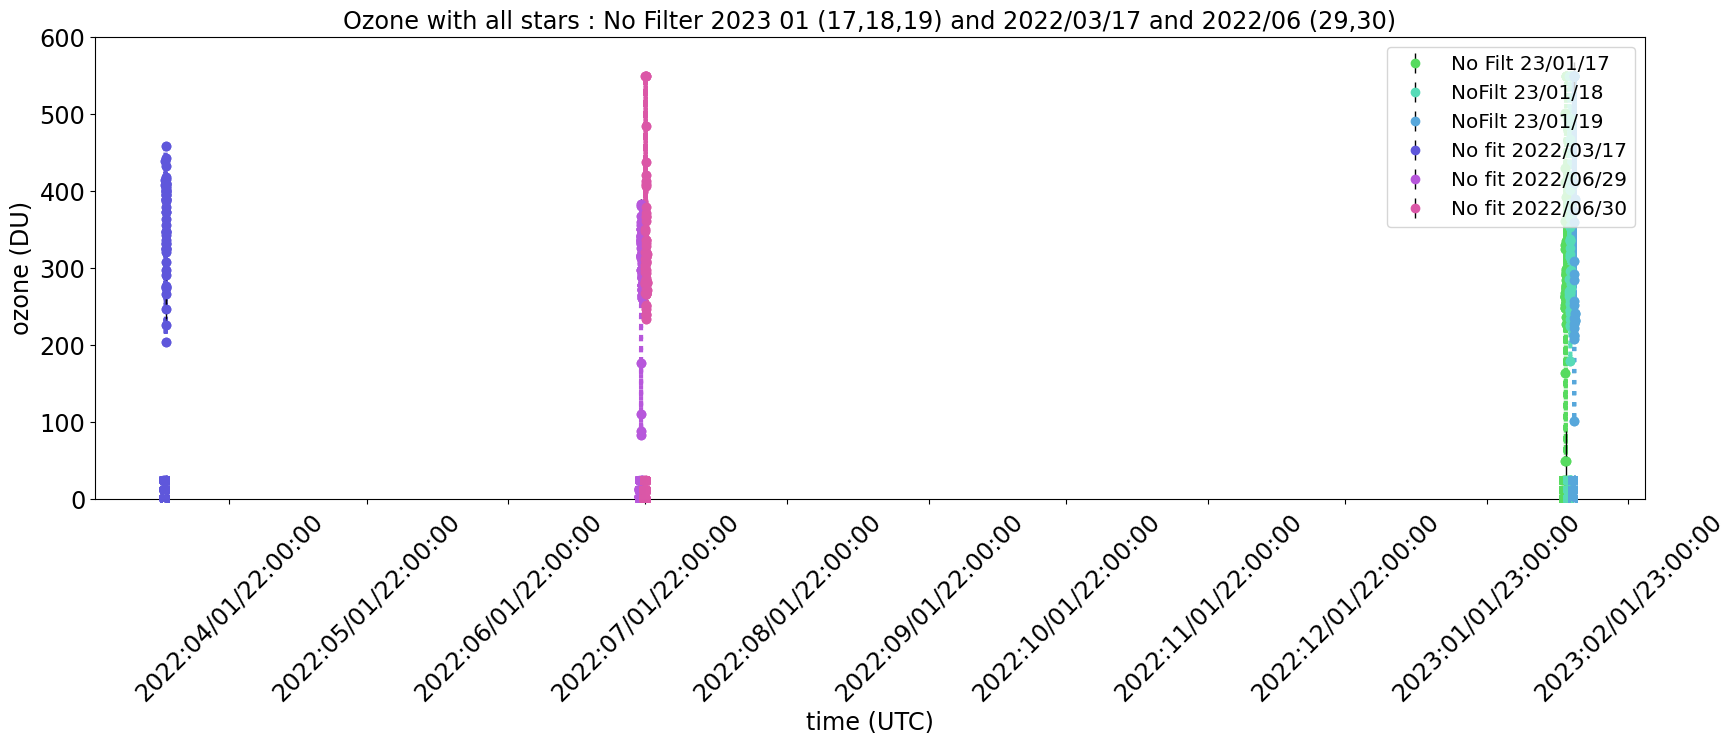

In [23]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx<3:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    oz= infos['oz_1'].values
    eoz= infos['eoz_1'].values
    
   
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%Y:%D:%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,600) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Ozone with polar star HD185975 : No Filter {DATE}"
else:
    the_title = f"Ozone with all stars : No Filter {DATE}"


plt.title(the_title)
plt.grid()
plt.show()

     